# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
#test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csvv")
#test_survived_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/gender_submission.csv")
#test_data["Survived"] = test_survived_data["Survived"]

###

total_data = pd.concat([train_data]).reset_index(inplace = False)
total_data.drop(columns = ["index"], inplace = True)
total_data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
total_data.shape


(48895, 16)

In [8]:
total_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
total_data.iloc[0]

id                                                              2539
name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
neighbourhood_group                                         Brooklyn
neighbourhood                                             Kensington
latitude                                                    40.64749
longitude                                                  -73.97237
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
last_review                                               2018-10-19
reviews_per_month                                               0.21
calculated_host_listings_count    

In [10]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [11]:
total_data.isnull().sum(axis=0)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Of the 48,895 properties, Roughly 10K lack a review. 16 Lack a propperty name. 21 lack a host name. 

In [18]:
total_data['id'].value_counts#(normalize=True)

<bound method IndexOpsMixin.value_counts of 0            2539
1            2595
2            3647
3            3831
4            5022
           ...   
48890    36484665
48891    36485057
48892    36485431
48893    36485609
48894    36487245
Name: id, Length: 48895, dtype: int64>

In [19]:
total_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [15]:
#Price would be a more important describe analysis 

total_data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [20]:
total_data['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [21]:
total_data.duplicated()#.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [22]:
total_data.duplicated().sum()

0

In [24]:
total_data['id'].duplicated().sum()

0

In [25]:
total_data['host_id'].duplicated().sum()

11438

In [26]:
total_data['host_name'].duplicated().sum()

37442

In [27]:
total_data['neighbourhood'].nunique()

221

In [28]:
total_data['neighbourhood_group'].nunique()

5

In [29]:
total_data['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [30]:
#Latitude and Longitude don't seem important here to me

total_data = total_data.drop(["latitude", "longitude"], axis=1)
total_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2


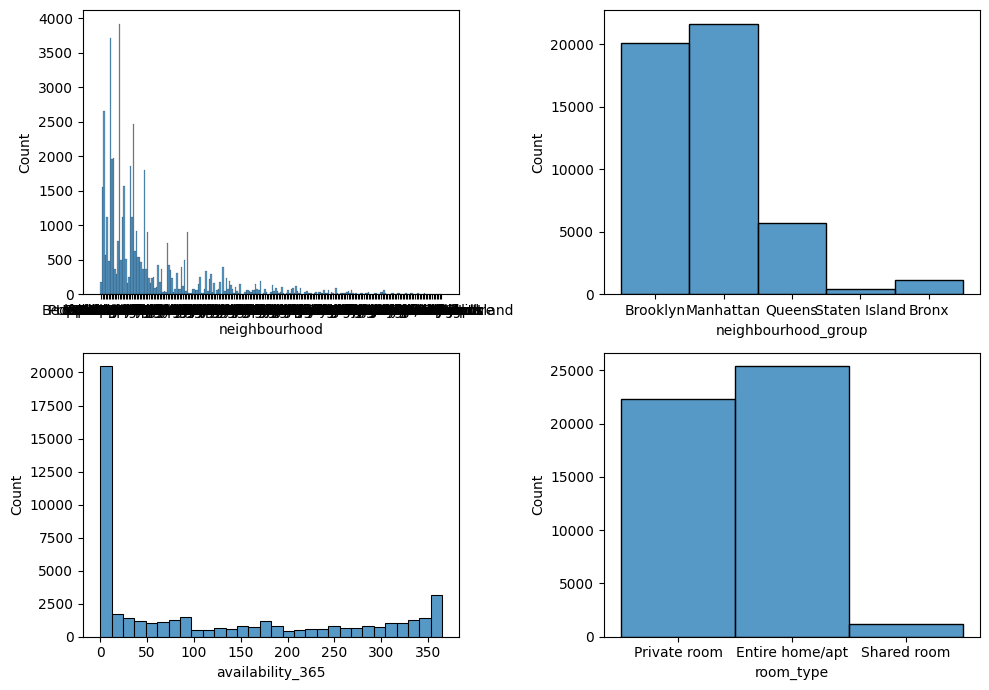

In [31]:
categorical_features = ['neighbourhood', 'availability_365', 'neighbourhood_group', 'room_type']

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = total_data, x = "neighbourhood")
sns.histplot(ax = axis[1, 0], data = total_data, x = "availability_365")
sns.histplot(ax = axis[0, 1], data = total_data, x = "neighbourhood_group")
sns.histplot(ax = axis[1, 1], data = total_data, x = "room_type")

# Adjust the layout
plt.tight_layout()

# Show the plot

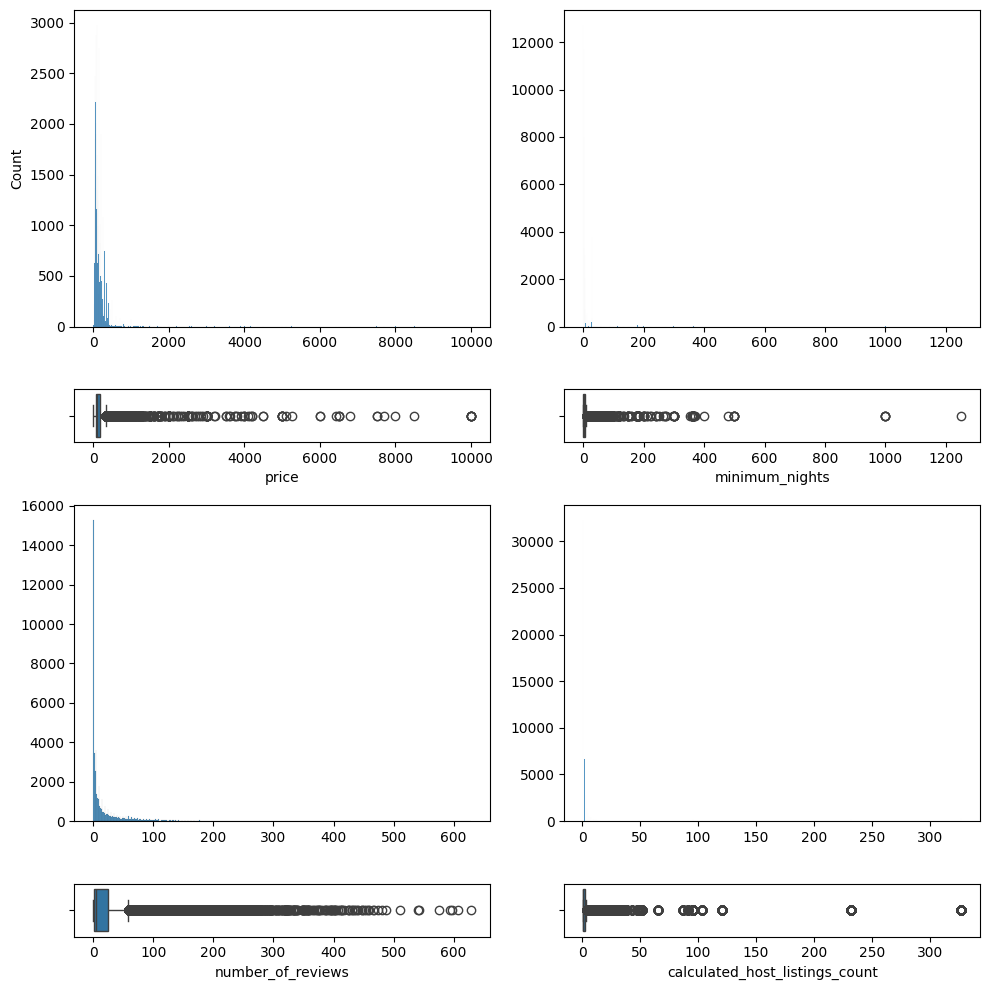

In [32]:
numerical_features = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count']

fig, axis = plt.subplots(4, 2, figsize = (10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = total_data, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")
sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews")
sns.histplot(ax = axis[2, 1], data = total_data, x = "calculated_host_listings_count").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
#Where is that outlier for price located?  I guessed Chelsea, Manhattan

max_price_index = total_data['price'].idxmax()
row_with_max_price = total_data.loc[max_price_index]

print(row_with_max_price)

id                                                            7003697
name                              Furnished room in Astoria apartment
host_id                                                      20582832
host_name                                                    Kathrine
neighbourhood_group                                            Queens
neighbourhood                                                 Astoria
room_type                                                Private room
price                                                           10000
minimum_nights                                                    100
number_of_reviews                                                   2
last_review                                                2016-02-13
reviews_per_month                                                0.04
calculated_host_listings_count                                      1
availability_365                                                    0
Name: 9151, dtype: o

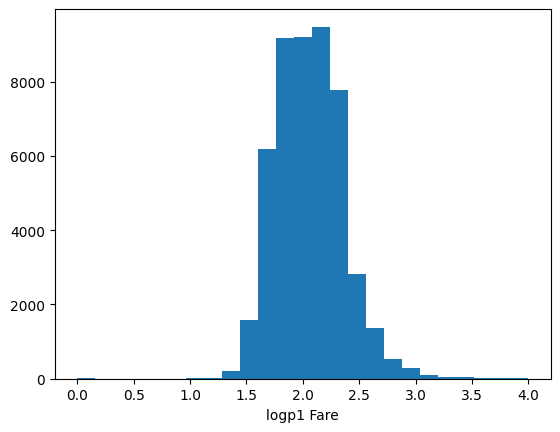

In [36]:
import numpy as np 

plt.hist(np.log10(total_data['price']+1), bins=25)
plt.xlabel('logp1 Fare')
plt.show()

In [37]:
#What is the numerical features in this project 

numerical_features

['price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count']

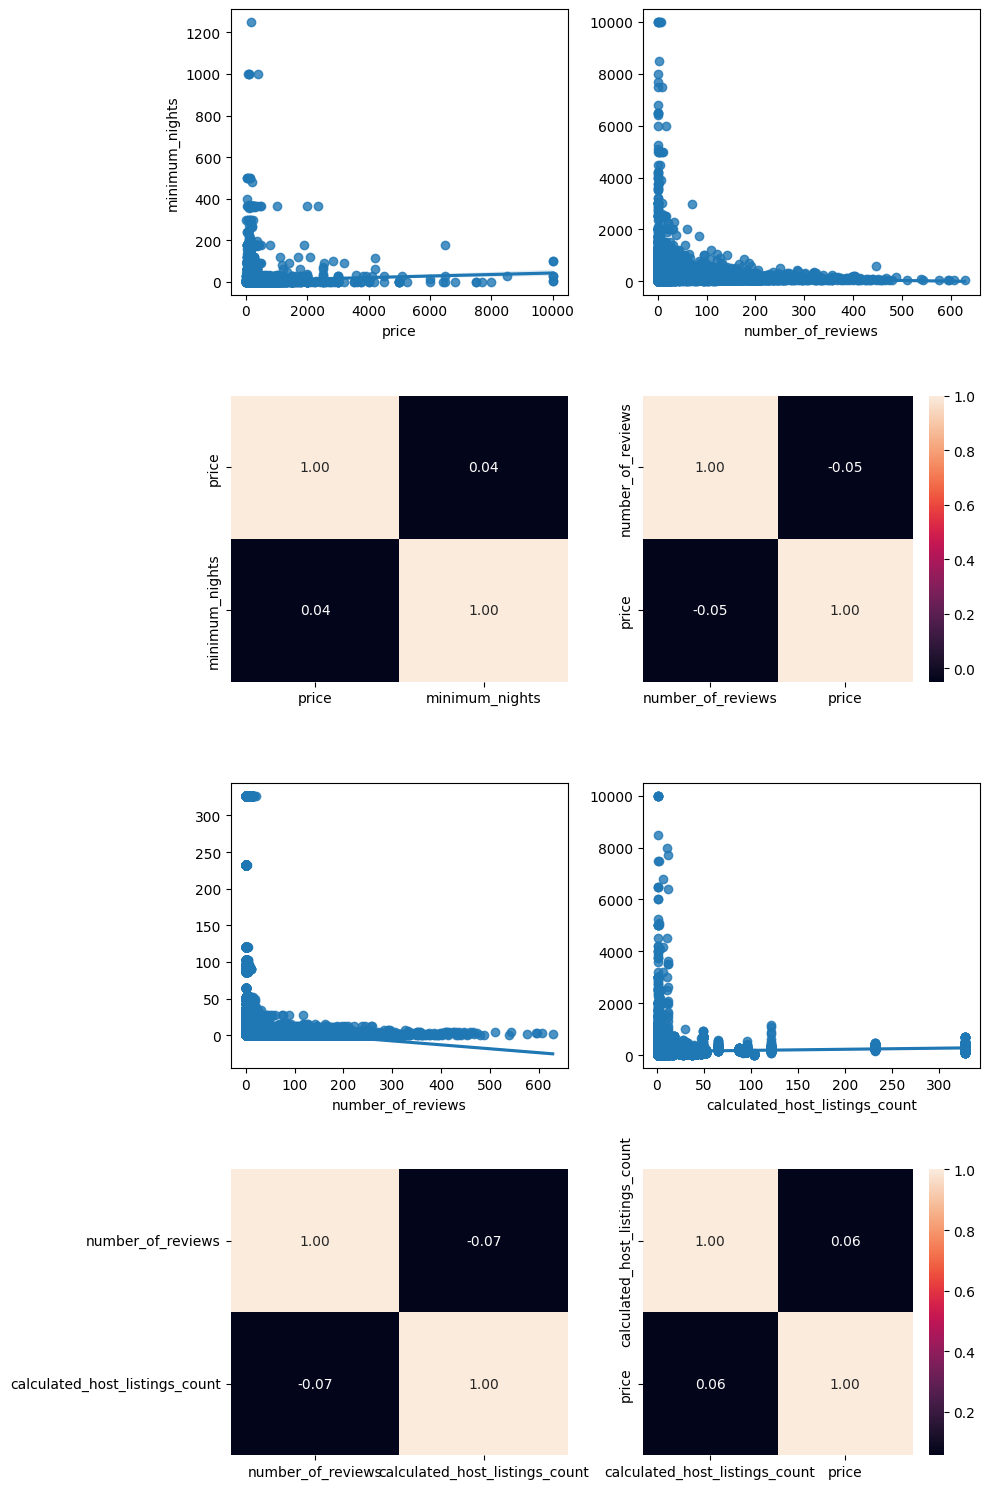

In [39]:
fig, axis = plt.subplots(4, 2, figsize = (10, 15))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "price", y = "minimum_nights")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(total_data[["number_of_reviews", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews", y = "calculated_host_listings_count").set(ylabel=None)
sns.heatmap(total_data[["number_of_reviews", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar=False)

sns.regplot(ax = axis[2, 1], data = total_data, x = "calculated_host_listings_count", y = "price").set(ylabel=None)
sns.heatmap(total_data[["calculated_host_listings_count", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])



# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

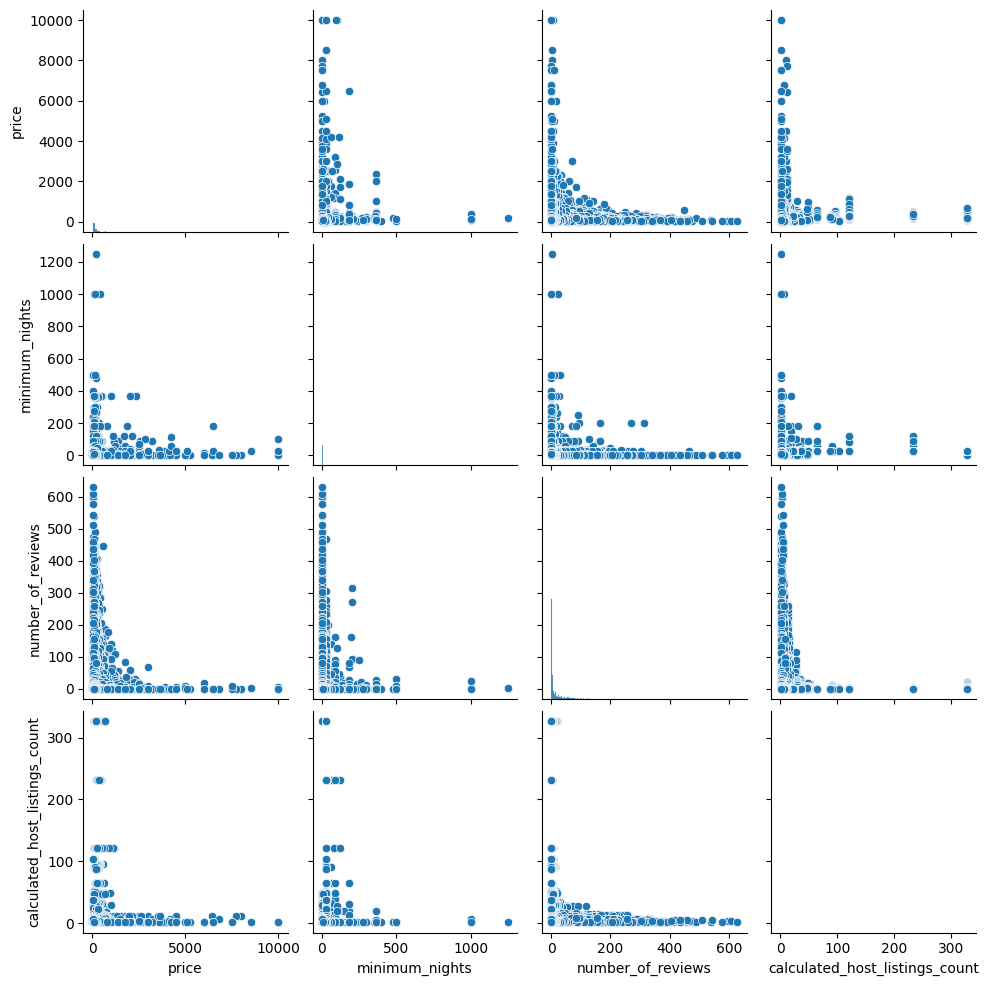

In [41]:
sns.pairplot(data = total_data[numerical_features + ['neighbourhood']])

#neighbourhood is not an int it's an object so it won't plot, without converting to an int 